#Ядерный практикум. Задача N5
##Электромагнитные взаимодействия.Определение энергииγ-квантов с помощьюсцинтилляционного спектрометра

**Цель работы:** *пределение энергии**$γ$**-излучения неизвестного источника.Измерения проводятся с помощью сцинтилляционного спектрометра.*

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.dpi'] = 100

###Упражнение 1.
Вначале необходимо проградуировать **$γ$**-спектрометр, т.е. получить зависимость номера канала амплитудного анализатора от энергии **$γ$**-кванта. С этой целью необходимо измерить спектры величин импульсов от 2-х **$γ$**-источников с известными энергиями **$γ$**-квантов. В полученных спектрах выделить пики полного поглощения (фотопики). Построить график зависимости номера канала пика полного поглощения от энергии **$γ$**-излучения.



In [3]:
data1 = np.loadtxt('/content/drive/MyDrive/прога/data1.txt')

Теперь нам нужно воспользоваться МНК: $E = kn+b$

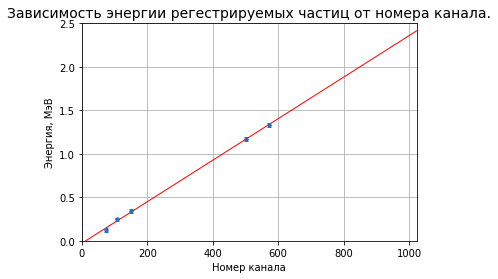

Результат МНК:
k = 0.0023876383113524435 ± 4.230580896190499e-05
b = -0.02855827575291764 ± 0.014861170832426555


In [4]:
def mnk(data):
  N = data.shape[0]
  x, y = data[:, 0], data[:, 1]

  mx, my = x.sum(), y.sum()
  a1, a2 = np.dot(x.T, y), np.dot(x.T, x)
  
  k = (N*a1 - mx*my)/(N*a2 - mx**2)
  b = (a2*my - mx*a1)/(N*a2 - mx**2)
  s0 = np.dot((y-k*x-b).T, (y-k*x-b))/(N-2)
  dk = (s0*N/(N*a2 - mx**2))**(1/2)
  db = (s0*a2/(N*a2 - mx**2))**(1/2)
  f = np.array([k*z+b for z in range(1024)])
  return k, dk, b, db, f, s0

k, dk, b, db, f, s0 = mnk(data1)
plt.ylabel('Энергия, МэВ')
plt.xlabel('Номер канала')
plt.xlim((0, 1023))
plt.ylim((0, 2.5))
plt.title('Зависимость энергии регестрируемых частиц от номера канала.', fontsize=14)
plt.plot(f, c='red', lw = 1)
plt.scatter(data1[:,0], data1[:,1], s=8, c='blue')
plt.errorbar(data1[:,0], data1[:,1], yerr=s0**(1/2), fmt='.', capsize=2, capthick=1);
plt.grid(True)
plt.show()
print ('Результат МНК:')
print ("k =", k, "±", dk)
print ("b =", b, "±", db)

###Упражнение 2.

Оценить разрешающую способность **$γ$**-спектрометра, определиввеличину Γ — ширину пика на половине его высоты («полуширина»). Здесь нам нужно просто перевести полуширину, измеренную в числе каналов, в МэВ.

In [13]:
data2 = np.loadtxt('/content/drive/MyDrive/прога/data2.txt')

G = np.absolute(data2*k + b)

co = G[0:2]
eu = G[2:5]
unt = G[5:]

print('Co-60 разрешение')
for i, j in enumerate(co):
  print('{i} пик: {j}'.format(i=i+1, j=j))

print('\nEu-152 разрешение')
for i, j in enumerate(eu):
  print('{i} пик: {j}'.format(i=i+1, j=j))

print('\nНеизвестный источник разрешение')
for i, j in enumerate(unt):
  print('{i} пик: {j}'.format(i=i+1, j=j))

Co-60 разрешение
1 пик: 0.050088142584720496
2 пик: 0.058850775187383964

Eu-152 разрешение
1 пик: 0.007832142627391618
2 пик: 0.005102649160529112
3 пик: 0.012595058181553077

Неизвестный источник разрешение
1 пик: 0.0011004351723645396
2 пик: 0.019865416839621265
3 пик: 0.027369764052201997
4 пик: 0.06334669812766061


###Упражнение 3
Определить энергию пика полного поглощения по данным ранее выполненной градуировки. По разрешающей способности спектрометра и полученным распределениям (пункт 2) оценить ошибку определения энергии ∆E для γ-квантов от неизвестного источника (X). Представить результат как $E(X) = E ± ∆E$

In [17]:
data3 = np.loadtxt('/content/drive/MyDrive/прога/data3.txt')
e_unt = k*data3 + b
de_unt = np.sqrt(dk**2+db**2+unt**2)

print('Энергия пиков неизвестного источника')
for i in range(data3.shape[0]):
  print('{i} пик: ({e} ± {de}) (МэВ)'.format(i=i, e=e_unt[i], de=de_unt[i]))

Энергия пиков неизвестного источника
0 пик: (0.04784615021036055 ± 0.014901917522943639) (МэВ)
1 пик: (0.17374393072966354 ± 0.024809090561807096) (МэВ)
2 пик: (0.5206462886243715 ± 0.03114418360730052) (МэВ)
3 пик: (1.344142742209829 ± 0.06506658398878028) (МэВ)
